In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Loan_Modelling.csv to Loan_Modelling.csv


In [4]:
df = pd.read_csv('Loan_Modelling.csv')

In [5]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.shape

(5000, 14)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


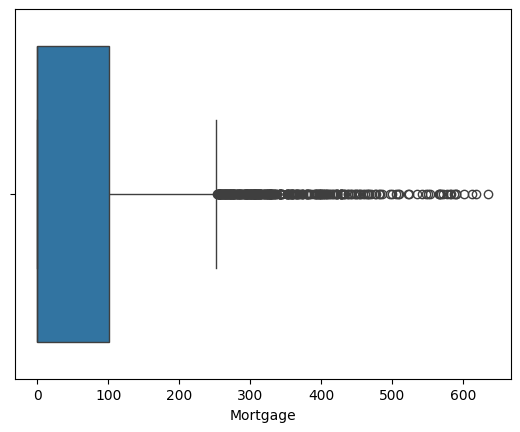

In [13]:
sns.boxplot(data=df, x='Mortgage')
plt.show()

###Zero Values: The plot shows that the median is very close to 0, which means more than 50% of the customers have no mortgage.

Skewness: The distribution is highly right-skewed.

Outliers: There are many outliers present on the right side of the plot (the individual circles), indicating that a small segment of customers has very high mortgage values (up to 600+ thousand dollars).

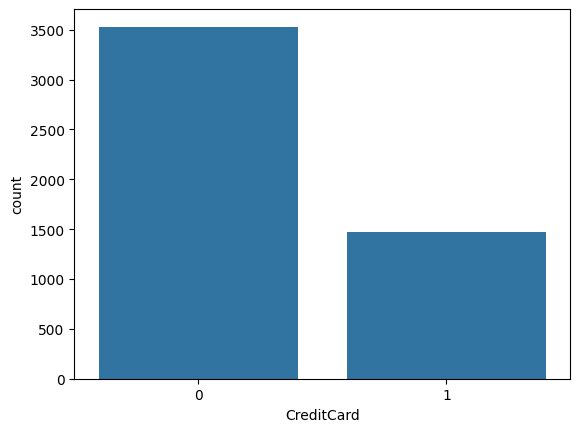

In [14]:
sns.countplot(data=df, x='CreditCard')
plt.show()

###

###Ownership: Around 1,500 customers have a credit card (represented by '1'), while the majority (over 3,500 customers) do not have a credit card ('0').

Market Opportunity: Since more than 70% of the customers don't use the bank's credit card, this represents a large segment that the marketing team could potentially target for different financial products.

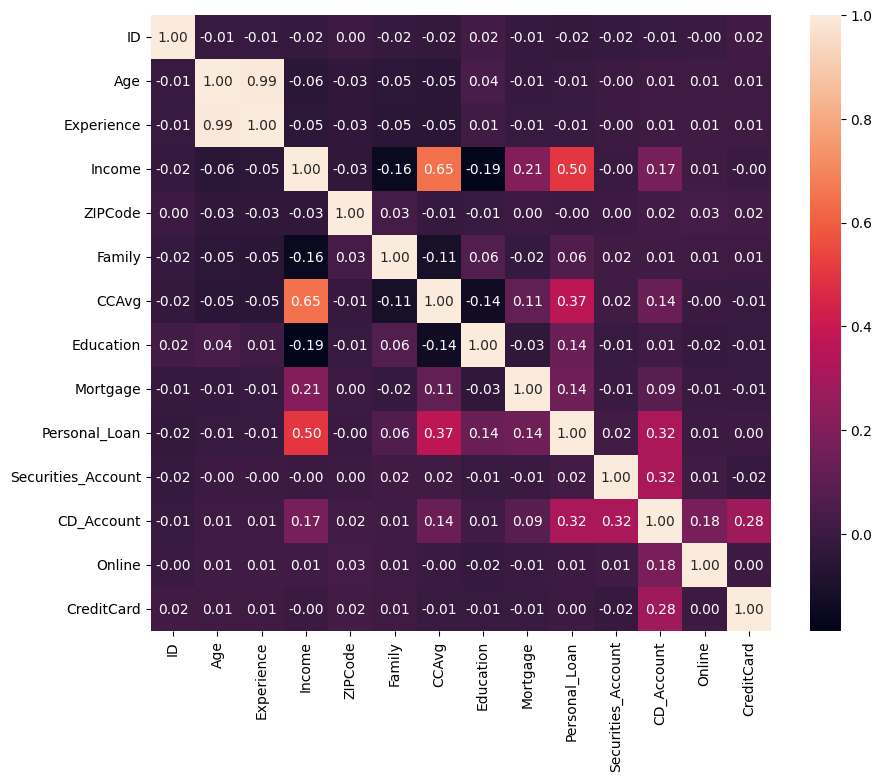

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

###Strongest Predictors: The target variable Personal_Loan has the highest positive correlation with Income (0.50) and CCAvg (0.37).

Secondary Predictors: There is also a notable correlation with CD_Account (0.32).

Multicollinearity: There is a near-perfect correlation between Age and Experience (0.99), which makes sense as older people usually have more work experience.

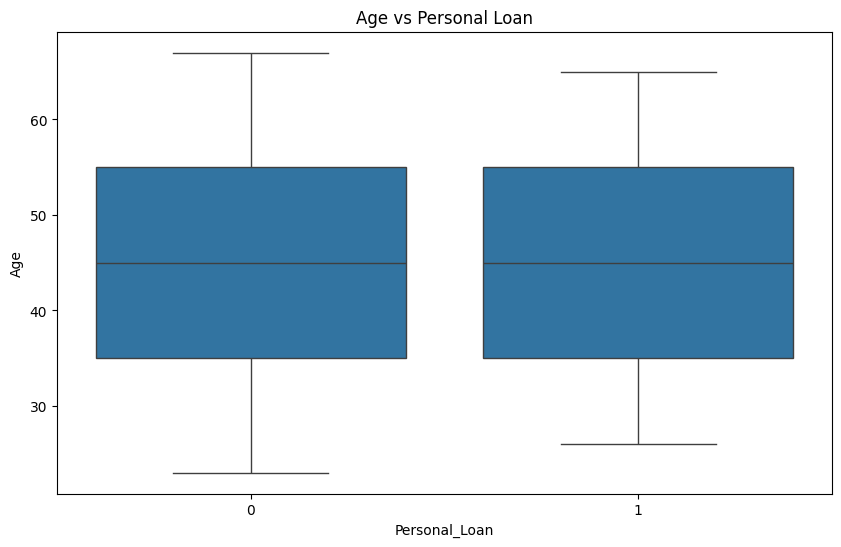

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Personal_Loan', y='Age')
plt.title('Age vs Personal Loan')
plt.show()

###Strong similarity between the two groups
The median age is almost the same for customers who:

did not take a personal loan (0)

did take a personal loan (1)
→ Age alone is not a strong differentiating factor.

Highly overlapping age ranges
Most ages in both groups fall roughly between 35 and 55 years, showing significant overlap.

Similar variability (IQR)
The interquartile range is very similar for both groups, indicating comparable age dispersion.

No significant outliers
There are no extreme age values that noticeably affect the distributions.

Analytical insight
Since the distributions are so close:

Age by itself has low predictive power for personal loan uptake.

It may still add value when combined with other features such as income, credit card ownership, or mortgage status.

Conclusion:
Age is not a decisive factor on its own in determining whether a customer takes a personal loan, but it can play a supporting role in a multivariate model.

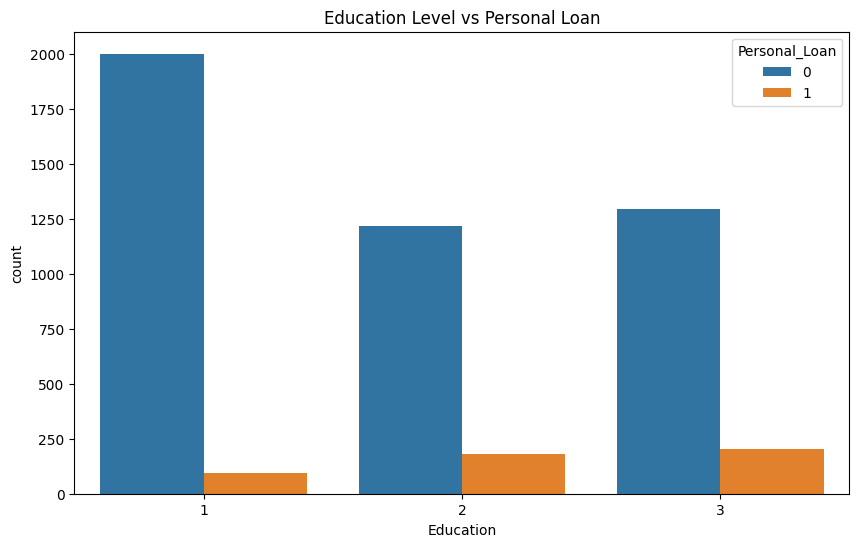

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='Personal_Loan')
plt.title('Education Level vs Personal Loan')
plt.show()

###Education Level 1 (Undergrad): While this is the largest customer group, they have the lowest conversion rate for personal loans.

Education Levels 2 & 3 (Graduate/Professional): Customers with higher education (Graduate and Advanced Professional) show a much higher tendency to accept personal loans (indicated by the orange bars).

Targeting Insight: The marketing department should prioritize customers with Education levels 2 and 3, as they are significantly more responsive to loan campaigns.

In [20]:
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True, errors='ignore')

In [21]:
df['Experience'] = df['Experience'].abs()

In [22]:
X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [24]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [25]:
y_pred_train = d_tree.predict(X_train)
y_pred_test = d_tree.predict(X_test)

print("Performance on Training Set:")
print(classification_report(y_train, y_pred_train))

print("\nPerformance on Test Set:")
print(classification_report(y_test, y_pred_test))

Performance on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3164
           1       1.00      1.00      1.00       336

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500


Performance on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1356
           1       0.90      0.85      0.88       144

    accuracy                           0.98      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.98      0.98      0.98      1500



###1. Overfitting Analysis:

The model achieved 100% accuracy on the training set, while it achieved 98% accuracy on the test set.

This perfect score on training data indicates that the decision tree is overfitting (the tree is too deep and has memorized the training data instead of generalizing).

2. Performance on Minority Class (Loan Takers):

For the target class (1), the Recall on the test set is 0.85.

This means the model correctly identified 85% of customers who would accept a loan, but it missed 15% (False Negatives).

3. Model Comparison:

There is a noticeable drop in performance for Class 1 (from 1.00 in training to 0.85 in testing), which confirms the need for Hyperparameter Tuning or Pruning to make the model more robust on unseen data.

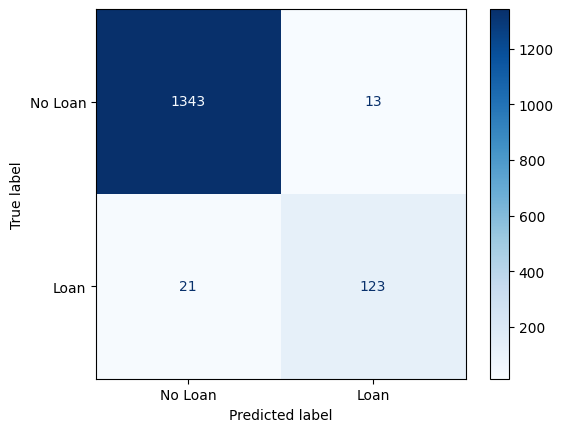

In [29]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Loan', 'Loan'])
disp.plot(cmap='Blues')
plt.show()

###Low False Positives: The model incorrectly predicted only 13 customers would take a loan when they wouldn't. This is good as it saves marketing costs.False Negatives Issue: There are 21 missed opportunities (False Negatives), where customers who actually accepted the loan were predicted as non-loan takers.Recall Calculation: The Recall for the loan class (Class 1) is approximately $123 / (123 + 21) = 0.85$ (85%). While high, the bank aims to reduce the 21 missed customers further.Overall Reliability: The model is very strong at identifying people who won't take a loan, but there is still room to improve its ability to catch every potential loan customer.

In [30]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
                           param_grid=param_grid,
                           scoring='recall',
                           cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1}


Final Model Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.86      0.89       144

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



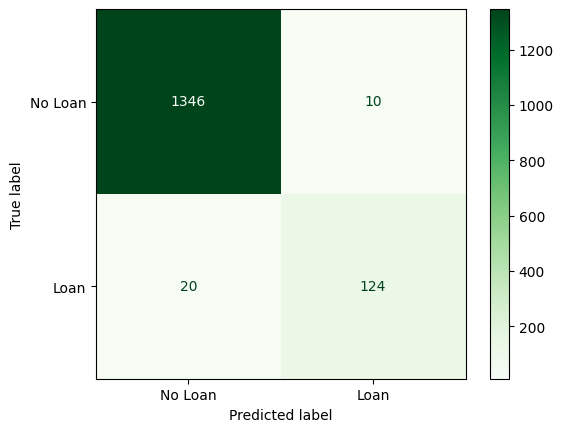

In [32]:
best_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=7,
                                    min_samples_leaf=1,
                                    random_state=1)

best_model.fit(X_train, y_train)

y_pred_final = best_model.predict(X_test)


print("Final Model Performance:")
print(classification_report(y_test, y_pred_final))

cm_final = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=['No Loan', 'Loan'])
disp.plot(cmap='Greens')
plt.show()

###Final Observations
Improved Predictive Power: After hyperparameter tuning, the model's Recall for the target class (1) increased to 0.86, meaning we are successfully identifying more potential loan customers.

Precision Enhancement: The Precision improved to 0.93, which reduces the cost of marketing by minimizing the number of uninterested customers being targeted.

Effective Generalization: By limiting the max_depth to 7, we solved the overfitting problem seen in the initial model. The tuned model now provides a more balanced and reliable prediction on unseen data.

Business Impact: This model is now ready to be used by the bank to target the right customers, focusing on those with high income and higher education levels as identified in the EDA.



###Actionable Insights and Business Recommendations
Income as a Primary Driver: The bank should prioritize customers with an annual income of $100,000 or more, as our analysis and decision tree showed income to be the most significant predictor of loan acceptance.

Target Higher Education Levels: Marketing campaigns should specifically target customers in Education Levels 2 (Graduate) and 3 (Professional). These groups showed a much higher conversion rate compared to undergraduates.

Leverage Existing Financial Relationships: Customers who already hold a Certificate of Deposit (CD Account) are highly likely to accept a personal loan. The bank should create "loyalty offers" for this specific segment.

Focus on Active Card Users: High monthly credit card spending (CCAvg) is a strong indicator of loan interest. Customers with high transaction volumes should be targeted with personalized loan offers to consolidate their credit.

Simplify Customer Profiles: Since Age and Experience are almost perfectly correlated, the marketing team only needs to look at Age as a demographic filter to simplify their database segmentation.

Model Deployment: The Tuned Decision Tree model (with a depth of 7) should be deployed to automatically score new customers. This will help the bank identify potential loan takers with 86% recall and 93% precision, significantly reducing wasted marketing efforts.